In [1]:
import pandas as pd
import numpy as np
import ast
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [3]:
transactions_df= pd.read_csv("drive/MyDrive/collab_files/transactions.csv")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
transactions = transactions_df.groupby("customer_id")["product_id"].apply(list)

print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


customer_id
0        [20664, 15083, 12468, 12505, 1505, 26387, 2066...
1        [19325, 20748, 11188, 20562, 4770, 29047, 2911...
2        [30829, 23476, 9779, 15445, 2742, 28815, 23635...
3        [31799, 26152, 23687, 4424, 8935, 27122, 6738,...
4        [18860, 30779, 20518, 32609, 24047, 29546, 293...
                               ...                        
46133    [15423, 4063, 20980, 16162, 5468, 29657, 12125...
46134    [24763, 17193, 9162, 21901, 26721, 20164, 1539...
46135      [6523, 17807, 20131, 17785, 1998, 24557, 32204]
46136    [30368, 17881, 13155, 23480, 29657, 19600, 283...
46137    [28900, 20209, 28343, 32292, 2667, 14695, 2240...
Name: product_id, Length: 46138, dtype: object


In [5]:

# Transform the data
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
te_df = pd.DataFrame(te_data, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(te_df, min_support=0.01, use_colnames=True)

# Pass `num_itemsets` explicitly to avoid the error
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="lift", min_threshold=1.1)

# Output the results
print("Frequent Itemsets:")
print(frequent_itemsets)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
      support        itemsets
0    0.040140           (395)
1    0.013221           (461)
2    0.012463           (550)
3    0.034592           (637)
4    0.011964           (875)
..        ...             ...
275  0.013633  (20131, 18630)
276  0.029520  (29657, 18630)
277  0.020937  (29657, 20131)
278  0.010295  (29657, 23050)
279  0.016386  (29657, 29660)

[280 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


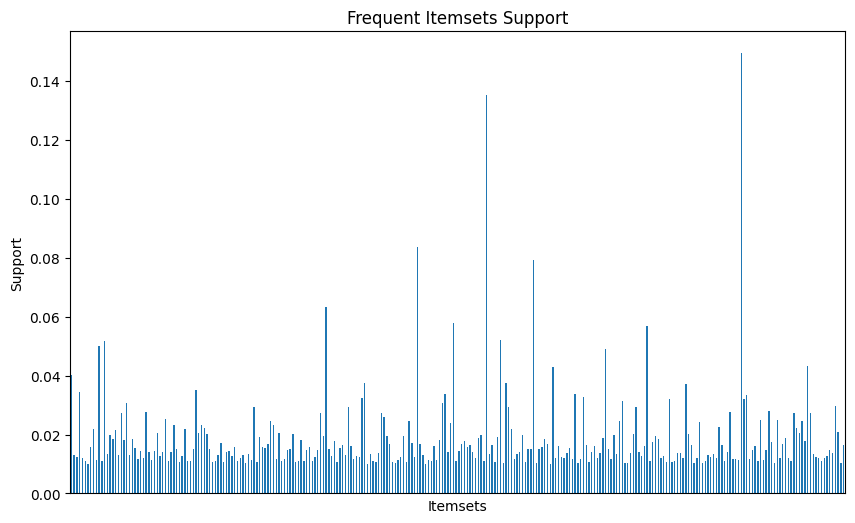

In [6]:
import matplotlib.pyplot as plt

# Plot support of frequent itemsets
frequent_itemsets['support'].plot(kind='bar', figsize=(10, 6))
plt.title('Frequent Itemsets Support')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks([])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


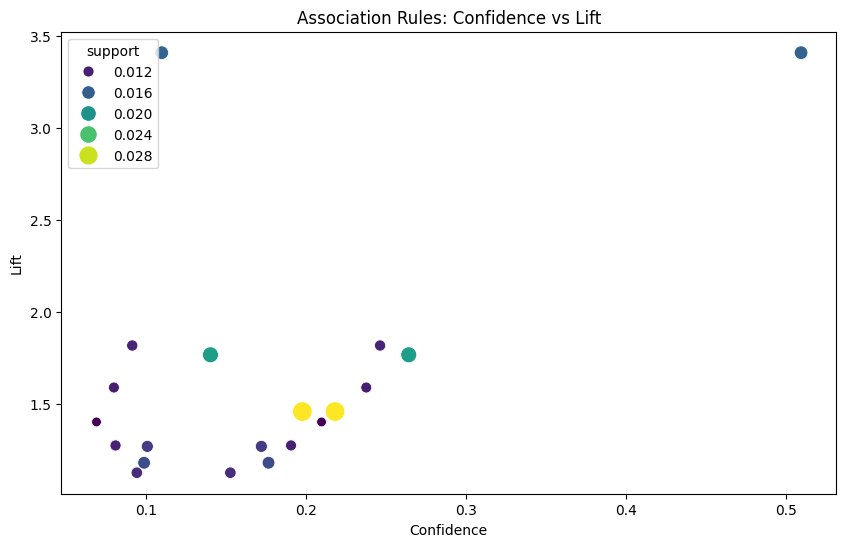

In [7]:
import seaborn as sns

# Plot association rules with confidence vs lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', hue='support', size='support', sizes=(50, 200), palette='viridis')
plt.title('Association Rules: Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


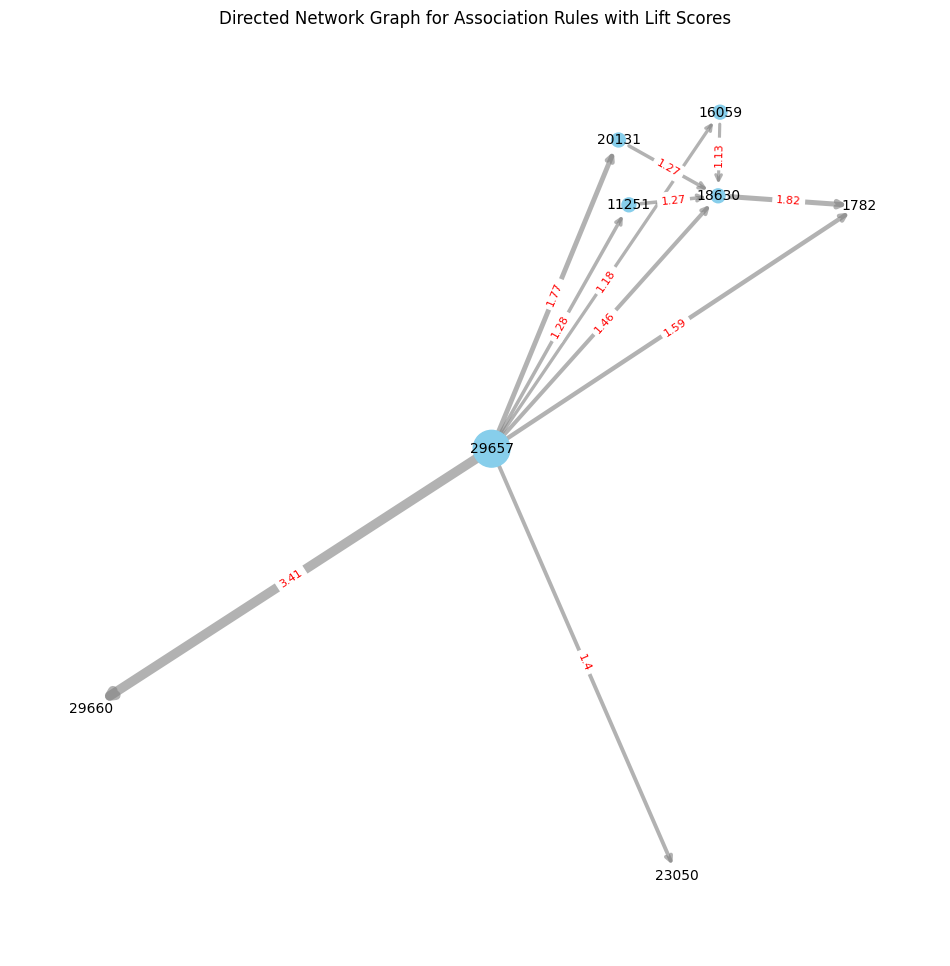

In [25]:
import networkx as nx

G = nx.DiGraph()

for _, rule in rules.iterrows():
    antecedents = rule['antecedents']
    consequents = rule['consequents']
    lift = rule['lift']

    if lift > 1.1:
        for item in antecedents:
            for item2 in consequents:
                if not G.has_edge(item2, item):
                    G.add_edge(item, item2, weight=lift)

# Set up the plot size
plt.figure(figsize=(12, 12))

# Apply the spring layout (force-directed layout)
pos = nx.spring_layout(G, k=0.15, iterations=30, seed=42)

# Draw nodes with larger size based on degree (number of connections)
node_sizes = [len(list(G.neighbors(node))) * 100 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')

# Draw directed edges with width proportional to lift (stronger lifts = thicker edges)
edges = G.edges(data=True)
edge_widths = [edge[2]['weight'] * 2 for edge in edges]  # Scale lift for edge thickness
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=10)

# Draw labels on nodes
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw labels on edges (lift scores)
edge_labels = {(edge[0], edge[1]): f"{round(edge[2]['weight'], 2)}"
               for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Display the title and show the plot
plt.title('Directed Network Graph for Association Rules with Lift Scores')
plt.axis('off')  # Hide axis
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
